In [69]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)
pic_ind = 0

# Лабораторная работа $№6$ 

# «Методы прямого поиска»
<font size="4">**Вариант $№6$**</font>

Найти с заданной точностью точку минимума и минимальное значение целевой функции методами:
    
    • метод циклического покоординатного спуска;
    
    • метод Хука-Дживса;
    
    • метод Розенброка.

Начинать всегда с квадратичной функции (аналитически для нее найти точное решение, с котором сравнивать полученное численное). Далее исследовать функцию Розенброка  $f(x,y)= \alpha (x^2 - y)^2 + (x-1)^2$ различными параметрами $\alpha$. При исследовании для каждой функции брать два параметра точности поиска $\varepsilon = 0.01$ и $\varepsilon = 0.00001$. 
 
   Также для каждой функции и каждого параметра точности поиска взять две различные (существенно различные) начальные точки. Начальные точки выбрать самостоятельно. В методах, в которых необходимо проводить одномерную минимизацию (например в наискорейшем спуске), использовать свой метод золотого сечения, реализованный в лабораторной работе №1.

   В результате исследований должно быть выявлено влияние на стоимость методов (количество вычисленных значений целевой функции)
    
   • параметров точности поиска;
    
   • начальной точки;
    
   • выпуклости (переход от квадратичной функции к функции Розенброка);
    
   • овражности функции (параметра  в функции Розенброка).

# Постановка задачи
1) $f_1(x, y) = 5x^2 + 4xy + 2y^2 + 4\sqrt5 (x+y) + 51$;

   $f_1(x, y) \to min,\phantom{x} (x, y) \in \mathbb{R}^2$.
 
$\phantom{x}$ 
2) $f_2(x, y) = \alpha (x^2 - y)^2 + (x-1)^2$, $\phantom{x}\alpha \in \{1, 20\}$;

   $\phantom{xxi}$ $f_2(x, y) \to min,\phantom{x} (x, y) \in \mathbb{R}^2$.


In [70]:
import numpy as np

def f1_pl(x, y):
    return 5*x*x + 4*x*y + 2*y*y + 4*np.sqrt(5)*(x+y) + 51
def f21_pl(x, y):
    return (x*x - y)**2 + (x-1)**2
def f22_pl(x, y):
    return 20*(x*x - y)**2 + (x-1)**2

In [71]:
eps1 = 0.01
eps2 = 10**(-5)

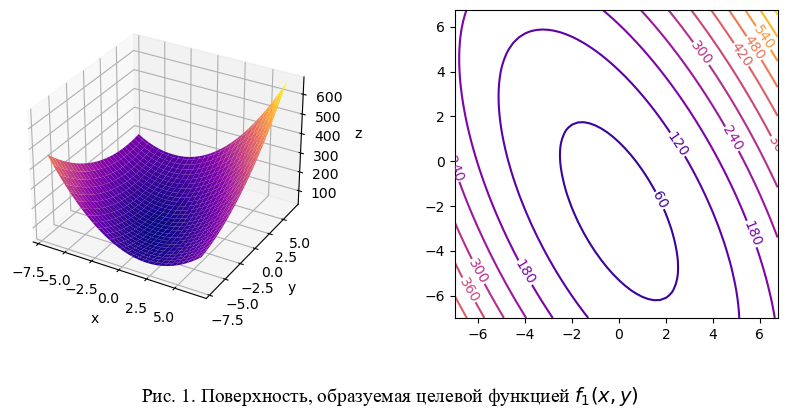

In [72]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(10, 4))
axes1 = fig.add_subplot(1, 2, 1, projection='3d')
axes2 = fig.add_subplot(1, 2, 2)

X = np.arange(-7, 7, 0.25)
Y = np.arange(-7, 7, 0.25)
X, Y = np.meshgrid(X, Y)
F1 = np.vectorize(f1_pl)
Z = F1(X, Y)

surf = axes1.plot_surface(X, Y, Z, cmap=cm.plasma,
                       linewidth=1, antialiased=True)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_zlabel('z')
axes1.zaxis.labelpad=4.5


CS00 = axes2.contour(X, Y, Z, levels=11, cmap=cm.plasma, zorder=1)
axes2.clabel(CS00, CS00.levels,inline=True,inline_spacing = 1)
#cbaxes = fig.add_axes([0.9, 0.2, 0.06, 0.5]) 
#cb = plt.colorbar(surf, cax = cbaxes)

plt.subplots_adjust(wspace=0.4)
plt.title('Рис. 1. Поверхность, образуемая целевой функцией $f_1(x,y)$',
             fontsize=14, fontname='Times New Roman',y=-0.3, x = -0.2)
plt.show()

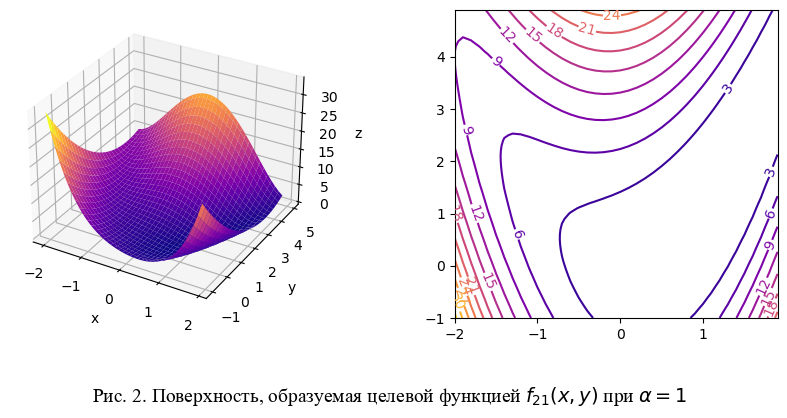

In [73]:
fig = plt.figure(figsize=(10, 4))
axes1 = fig.add_subplot(1, 2, 1, projection='3d')
axes2 = fig.add_subplot(1, 2, 2)

X = np.arange(-2, 2,0.1)
Y = np.arange(-1, 5, 0.1)
X, Y = np.meshgrid(X, Y)
F2 = np.vectorize(f21_pl)
Z = F2(X, Y)

surf = axes1.plot_surface(X, Y, Z, cmap=cm.plasma,
                       linewidth=1, antialiased=True)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_zlabel('z')
axes1.zaxis.labelpad=4.5


CS00 = axes2.contour(X, Y, Z, levels=11, cmap=cm.plasma, zorder=1)
axes2.clabel(CS00, CS00.levels,inline=True,inline_spacing = 1)
#cbaxes = fig.add_axes([0.9, 0.2, 0.06, 0.5]) 
#cb = plt.colorbar(surf, cax = cbaxes)

plt.subplots_adjust(wspace=0.4)
plt.title('Рис. 2. Поверхность, образуемая целевой функцией $f_{21}(x,y)$ при $α = 1$',
             fontsize=14, fontname='Times New Roman',y=-0.3, x = -0.2)
 
plt.show()

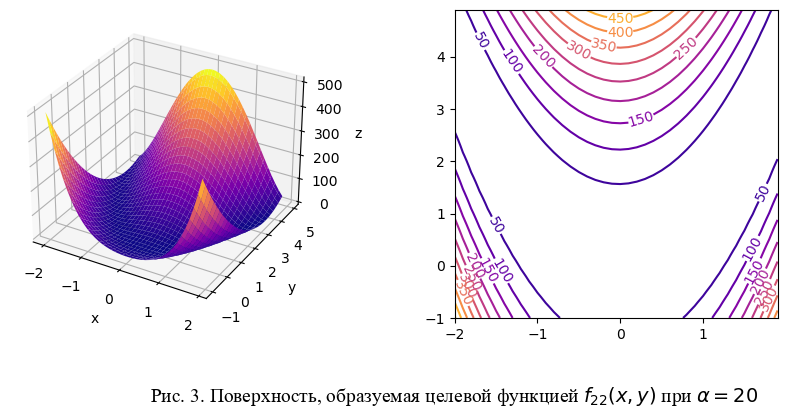

In [74]:
fig = plt.figure(figsize=(10, 4))
axes1 = fig.add_subplot(1, 2, 1, projection='3d')
axes2 = fig.add_subplot(1, 2, 2)

X = np.arange(-2, 2,0.1)
Y = np.arange(-1, 5, 0.1)
X, Y = np.meshgrid(X, Y)
F22 = np.vectorize(f22_pl)
Z = F22(X, Y)

surf = axes1.plot_surface(X, Y, Z, cmap=cm.plasma,
                       linewidth=1, antialiased=True)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_zlabel('z')
axes1.zaxis.labelpad=4.5


CS00 = axes2.contour(X, Y, Z, levels=10, cmap=cm.plasma, zorder=1)
axes2.clabel(CS00, CS00.levels,inline=True,inline_spacing = 1)
#cbaxes = fig.add_axes([0.9, 0.2, 0.06, 0.5]) 
#cb = plt.colorbar(surf, cax = cbaxes)

plt.subplots_adjust(wspace=0.4)
plt.title('Рис. 3. Поверхность, образуемая целевой функцией $f_{22}(x,y)$ при $α = 20$',
             fontsize=14, fontname='Times New Roman',y=-0.3, x = 0)
 
plt.show()

In [75]:
def f1(x):
    return 5*x[0]*x[0] + 4*x[0]*x[1] + 2*x[1]*x[1] + 4*np.sqrt(5)*(x[0]+x[1]) + 51
def f21(x):
    return (x[0]*x[0] - x[1])**2 + (x[0]-1)**2
def f22(x):
    return 20*(x[0]*x[0] - x[1])**2 + (x[0]-1)**2

In [139]:
def GoldenRatioMinSearch(func, a, b, eps):
    tau = (1 + np.sqrt(5))/2
    length = b - a
    x1 = a + (1 - 1/tau)*length
    x2 = a + length/tau
    f1 = func(x1)
    f2 = func(x2)
    while length >= eps:
        if f1 < f2:
            b = x2
            x2 = x1
            x1 = a + b - x2
            f2 = f1
            f1 = func(x1)
        else:
            a  = x1
            x1 = x2
            x2 = a + b - x1
            f1 = f2
            f2 = func(x2)
        length = b - a
    return (a+b)/2
def CyclicCoordinateDescentMinSearch(func, x0, eps):
    x = x0
    f = func(x0)
    k = 0
    e1 = np.array([1,0])
    e2 = np.array([0,1])
    basis = [e1, e2]
    while True:
        x_prev = x
        f_prev = f
#         for j in range(1):
#             phi = lambda a: func(x + a*basis[j])
#             alpha = GoldenRatioMinSearch(phi, -2.5, 2.5, eps*1e-3)
#             x = x + alpha*basis[j]
        phi = lambda a: func(x + a*e1)
        alpha = GoldenRatioMinSearch(phi, 0, 5, eps*1e-1)
        x = x + alpha*e1
        
        phi = lambda a: func(x + a*e2)
        alpha = GoldenRatioMinSearch(phi, 0, 5, eps*1e-1)
        x = x + alpha*e2
        
        f = func(x)
        if np.linalg.norm(x-x_prev) < eps and np.linalg.norm(f-f_prev) < eps:
            break
        k += 1
        if k >= 1000 : break
    return x, f, k
#############################################################
def HookeJeevesMinSearch(func, x0, eps):
    x = x0
    b = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
    gamma = 2
    a = 2
    k = 0
    x_wave = x0
    x_wave_j = x0
    f = func(x0)
    e1 = np.array([1,0])
    e2 = np.array([0,1])
    k = 0
    while True:
        x_wave_prev = x_wave
        f_plus  = func(x_wave_j + b[0]*e1)
        f_minus = func(x_wave_j - b[0]*e1)
        
        if(f_plus < f and f_plus <= f_minus):
            x_wave_j = x_wave_j + b[0]*e1
        elif(f_minus < f and f_minus < f_plus):
            x_wave_j = x_wave_j - b[0]*e1
        
        f = func(x_wave_j)
        
        f_plus  = func(x_wave_j + b[1]*e2)
        f_minus = func(x_wave_j - b[1]*e2)
        
        if(f_plus < f and f_plus <= f_minus):
            x_wave_j = x_wave_j + b[1]*e2
        elif(f_minus < f and f_minus < f_plus):
            x_wave_j = x_wave_j - b[1]*e2
        
        f = func(x_wave_j)
        #####
        while(np.linalg.norm(x_wave_j - x_wave) < eps*1e-7):
            for i in range(len(b)):
                b[i] /= gamma
            
            f_plus  = func(x_wave_j + b[0]*e1)
            f_minus = func(x_wave_j - b[0]*e1)

            if(f_plus < f and f_plus <= f_minus):
                x_wave_j = x_wave_j + b[0]*e1
            elif(f_minus < f and f_minus < f_plus):
                x_wave_j = x_wave_j - b[0]*e1

            f = func(x_wave_j)

            f_plus  = func(x_wave_j + b[1]*e2)
            f_minus = func(x_wave_j - b[1]*e2)

            if(f_plus < f and f_plus <= f_minus):
                x_wave_j = x_wave_j + b[1]*e2
            elif(f_minus < f and f_minus < f_plus):
                x_wave_j = x_wave_j - b[1]*e2

            f = func(x_wave_j)
        ####
        if(np.linalg.norm(x_wave_j - x_wave)< eps):
            x = x_wave
            break
        x_wave = x_wave_j
        
        x = x_wave + a * (x_wave - x_wave_prev)
        
        k += 1
        if k >= 1000: break
    return x, func(x), k

#############################################
def RozenbrokMinSearch(func, x0, eps):
    x = x0
    x_wave = x
    f = func(x0)
    k = 0
    p1 = np.array([1, 0])
    p2 = np.array([0, 1])
    while True:
        x_prev = x
        
        psi = lambda kappa: func(x + kappa*p1)
        kappa1 = GoldenRatioMinSearch(psi, 0, 5, eps*1e-3)
        x_wave = x_wave + kappa1 * p1
        psi = lambda kappa: func(x + kappa*p2)
        kappa2 = GoldenRatioMinSearch(psi, 0, 5, eps*1e-3)
        x_wave = x_wave + kappa2 * p2
        
        x = x_wave
        
        if np.linalg.norm(x - x_prev) < eps:
            break
        
        a1 = np.array([1, 0])
        if(abs(kappa1) < eps*1e-7):
            a1 = p1
        else:
            a1 = a1 + kappa1*p1 + kappa2*p2
        
        a2 = np.array([0, 1])
        if(abs(kappa2) < eps*1e-7):
            a2 = p2
        else:
            a2 = a2 + kappa2*p2
        
        
        b1 = a1
        
        b2 = a2 - np.dot(a1, p1)*p1
        
        p1 = b1/np.linalg.norm(b1)
        p2 = b2/np.linalg.norm(b2)
        
        
        k += 1
        if k >= 1000: break
    return x, func(x), k

-1.5719027923764852

In [77]:
RozenbrokMinSearch(f1, [3, 1], eps1)

(array([3.00000352, 1.00000352]), 145.777326468527, 0)

In [78]:
HookeJeevesMinSearch(f21, [3, 1], eps1)

(array([1.02231072, 1.04419417]), 0.0004986239818239079, 26)

In [79]:
CyclicCoordinateDescentMinSearch(f21, np.array([4,-2.5]), eps1)


(array([ 4.00216338, 16.0171927 ]), 9.012984964754944, 4)

# Анализ методов

In [158]:
def InfoGoldenRatioMinSearch(func, a, b, eps):
    fcalls = 0
    tau = (1 + np.sqrt(5))/2
    length = b - a
    x1 = a + (1 - 1/tau)*length
    x2 = a + length/tau
    f1 = func(x1)
    f2 = func(x2)
    fcalls += 2
    while length >= eps:
        if f1 < f2:
            b = x2
            x2 = x1
            x1 = a + b - x2
            f2 = f1
            f1 = func(x1)
            fcalls += 1
        else:
            a  = x1
            x1 = x2
            x2 = a + b - x1
            f1 = f2
            f2 = func(x2)
            fcalls += 1
        length = b - a
    res = (a+b)/2
    return res, fcalls
def InfoCyclicCoordinateDescentMinSearch(func, x0, eps):
    x = x0
    f = func(x0)
    k = 0
    e1 = np.array([1,0])
    e2 = np.array([0,1])
    basis = [e1, e2]
    xs = [x]
    fcalls = 1
    while True:
        x_prev = x
        f_prev = f
#         for j in range(1):
#             phi = lambda a: func(x + a*basis[j])
#             alpha = GoldenRatioMinSearch(phi, -2.5, 2.5, eps*1e-3)
#             x = x + alpha*basis[j]
        phi = lambda a: func(x + a*e1)
        alpha, temp_fcalls = InfoGoldenRatioMinSearch(phi, -5, 5, eps*1e-1)
        fcalls += temp_fcalls
        x = x + alpha*e1
        
        phi = lambda a: func(x + a*e2)
        alpha, temp_fcalls = InfoGoldenRatioMinSearch(phi, -5, 5, eps*1e-1)
        x = x + alpha*e2
        fcalls += temp_fcalls
        xs.append(x)
        f = func(x)
        if np.linalg.norm(x-x_prev) < eps and np.linalg.norm(f-f_prev) < eps:
            break
        k += 1
        if k >= 1000 : break
    return x, f, k, xs, fcalls
#############################################################
def InfoHookeJeevesMinSearch(func, x0, eps):
    x = x0
    xs = [x]
    b = np.array([1, 1])
    gamma = 2
    a = 2
    k = 0
    fcalls = 0
    e1 = np.array([1,0])
    e2 = np.array([0,1])
    k = 0
    while True:
        f = func(x)
        f_prev = f
        x_wave = x
        fcalls += 1
        x_wave_prev = x_wave
        f_plus  = func(x_wave + b[0]*e1)
        f_minus = func(x_wave - b[0]*e1)
        fcalls += 2
        if(f_plus < f and f_plus <= f_minus):
            x_wave = x_wave + b[0]*e1
            #f = f_plus
        elif(f_minus < f and f_minus < f_plus):
            x_wave = x_wave - b[0]*e1
            #f = f_minus
        f_plus  = func(x_wave + b[1]*e2)
        f_minus = func(x_wave - b[1]*e2)
        f = func(x_wave)
        fcalls += 1
        if(f_plus < f and f_plus <= f_minus):
            x_wave = x_wave + b[1]*e2
            f = f_plus
        elif(f_minus < f and f_minus < f_plus):
            x_wave = x_wave - b[1]*e2
            f = f_minus
        f = func(x_wave)   
        #####
        #while(np.linalg.norm(x_wave - x_wave_prev) < eps*1e-12):
        while(x_wave[0] == x[0] and x_wave[1] == x[1]):
            b = b / gamma
            
            f_plus  = func(x_wave + b[0]*e1)
            f_minus = func(x_wave - b[0]*e1)
            fcalls += 2
            if(f_plus < f and f_plus <= f_minus):
                x_wave = x_wave + b[0]*e1
                f = f_plus
            elif(f_minus < f and f_minus < f_plus):
                x_wave = x_wave - b[0]*e1
                f = f_minus
            f = func(x_wave)
            f_plus  = func(x_wave + b[1]*e2)
            f_minus = func(x_wave - b[1]*e2)
            fcalls += 2
            if(f_plus < f and f_plus <= f_minus):
                x_wave = x_wave + b[1]*e2
                f = f_plus
            elif(f_minus < f and f_minus < f_plus):
                x_wave = x_wave - b[1]*e2
                f = f_minus
            f = func(x_wave)
        ####
        f = func(x_wave)
        if(np.linalg.norm(x_wave - x_wave_prev)< eps and np.abs(f-f_prev) < eps):
            x = x_wave
            break
        
        phi = lambda a: func(x_wave + a * (x_wave - x_wave_prev))
        a, temp_fcalls = InfoGoldenRatioMinSearch(phi, -5, 5, eps*1e-1)
        x = x_wave + a * (x_wave - x_wave_prev)
        xs.append(x)
        k += 1
        if k >= 1000: break
    return x, func(x), k, xs, fcalls

#############################################
def InfoRozenbrokMinSearch(func, x0, eps):
    x = x0
    xs = [x]
    f = func(x0)
    fcalls = 1
    k = 0
    p1 = np.array([1, 0])
    p2 = np.array([0, 1])
    while True:
        x_prev = x
        x_wave = x
        f_prev = f
        psi1 = lambda kappa: func(x_wave + kappa*p1)
        kappa1, temp_fcalls = InfoGoldenRatioMinSearch(psi1, -5, 5, eps*1e-1)
        x_wave = x_wave + kappa1 * p1
        psi2 = lambda kappa: func(x_wave + kappa*p2)
        kappa2, temp_fcalls = InfoGoldenRatioMinSearch(psi2, -5, 5, eps*1e1)
        x_wave = x_wave + kappa2 * p2
        fcalls += temp_fcalls
        x = x_wave
        f = func(x_wave)
        xs.append(x)
        if np.linalg.norm(x - x_prev) < eps and np.abs(f-f_prev) < eps:
            break
        
        #if(abs(kappa1) < eps*1e-15):
        if(kappa1 == 0):
            a1 = p1
        else:
            a1 = kappa1*p1 + kappa2*p2
        
        #if(abs(kappa2) < eps*1e-15):
        if(kappa2 == 0): 
            a2 = p2
        else:
            a2 = kappa2*p2
        
        b1 = a1
        
        
        b2 = a2 - np.dot(a1, p1)*a2
        p1 = b1/np.linalg.norm(b1)
        p2 = b2/np.linalg.norm(b2)
        #p2 = np.array([p1[1], -p1[0]])
        
        k += 1
        if k >= 1000: break
    return x, func(x), k, xs, fcalls

In [81]:
ind = 4
def ExperimentPlot(func, xmin, xmax, ymin, ymax, n1, n2,n3,
                   x1, x2, x3,  
                    ind, xstart, ystart,
                    xspacing, yspacing, fnum = 1, eps = 2):
    xs1 = [el[0] for el in x1]
    ys1 = [el[1] for el in x1]
    xs2 = [el[0] for el in x2]
    ys2 = [el[1] for el in x2]
    xs3 = [el[0] for el in x3]
    ys3 = [el[1] for el in x3]
    x = np.linspace(xmin, xmax)
    y = np.linspace(ymin, ymax)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)
    fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(9, 5))
    levels1 = []
    levels2 = []
    levels3 = []
    ax[0].scatter(xs1[0:n1], ys1[0:n1], color='red', lw=0.05, zorder=2)
    ax[0].scatter(xs1[-1], ys1[-1], color='red', lw=0.05, marker='*', zorder=2)
    ax[1].scatter(xs2[0:n2], ys2[0:n2], color='red', lw=0.05, zorder=2)
    ax[1].scatter(xs2[-1], ys2[-1], color='red', lw=0.05, marker='*', zorder=2)
    ax[2].scatter(xs3[0:n3], ys3[0:n3], color='red', lw=0.05, zorder=2)
    ax[2].scatter(xs3[-1], ys3[-1], color='red', lw=0.05, marker='*', zorder=2)
    
    for i in range(0, n1):
        levels1.append(func(xs1[i], ys1[i]))
        ax[0].annotate('', xytext=(xs1[i], ys1[i]), xy=(xs1[i+1], ys1[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
    levels1 = list(set(levels1))
    levels1.sort()
    CS1 = ax[0].contour(X, Y, Z, cmap=cm.plasma, levels=levels1, zorder=1)
    ax[0].clabel(CS1, CS1.levels,inline=True,inline_spacing = 1)
    
    for i in range(0,n2):
        levels2.append(func(xs2[i], ys2[i]))
        ax[1].annotate('', xytext=(xs2[i], ys2[i]), xy=(xs2[i+1], ys2[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
    levels2 = list(set(levels2))
    levels2.sort()
    CS2 = ax[1].contour(X, Y, Z, cmap=cm.plasma, levels=levels2, zorder=1)
    ax[1].clabel(CS2, CS2.levels,inline=True,inline_spacing = 1)
    
    for i in range(0,n3):
        levels3.append(func(xs3[i], ys3[i]))
        ax[2].annotate('', xytext=(xs3[i], ys3[i]), xy=(xs3[i+1], ys3[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
    levels3 = list(set(levels3))
    levels3.sort()
    CS3 = ax[2].contour(X, Y, Z, cmap=cm.plasma, levels=levels3, zorder=1)
    ax[2].clabel(CS3, CS3.levels,inline=True,inline_spacing = 1)

    ax[0].annotate('$p_{min}$', xytext=(xs1[-1]+xspacing, ys1[-1]-yspacing), xy=(xs1[-1], ys1[-1]))
    ax[0].annotate('$p_{start}$', xytext=(xs1[0]+xspacing, ys1[0]-yspacing), xy=(xs1[0], ys1[0]))
    ax[0].set_xlabel('x \n \n a)')
    
    ax[1].annotate('$p_{min}$', xytext=(xs2[-1]+xspacing, ys2[-1]-yspacing), xy=(xs2[-1], ys2[-1]))
    ax[1].annotate('$p_{start}$', xytext=(xs2[0]+xspacing, ys2[0]-yspacing), xy=(xs2[0], ys2[0]))
    ax[1].set_xlabel('x \n \n б)')
    
    ax[2].annotate('$p_{min}$', xytext=(xs3[-1]+xspacing, ys3[-1]-yspacing), xy=(xs3[-1], ys3[-1]))
    ax[2].annotate('$p_{start}$', xytext=(xs3[0]+xspacing, ys3[0]-yspacing), xy=(xs3[0], ys3[0]))
    ax[2].set_xlabel('x \n \n в)')
    
    ax[0].set_ylabel('y')
    ax[1].set_ylabel('y')
    ax[2].set_ylabel('y')
    plt.title(f'Рис. {ind}.'+' Траектория поиска точки минимума функции $f_{'+f'{fnum}'+'}(x, y)$ методом \n \
    циклического покоординатного спуска (а), Хука-Дживса (б), Розенброка (в),\n $ε=10^{'+f'{-eps}'+'}$, $p_{start}=($'+f'{xstart}, {ystart}'+'$)$',
                 fontsize=14, fontname='Times New Roman',y=-0.56, x = -0.9)
    plt.tight_layout()
    plt.subplots_adjust( wspace=0.3,bottom=0.3)
    plt.show()

# Квадратичная функция

In [159]:
xmin1_f1, fmin1_f1, its1_f1, xs1f1, fcalls1_f1 = InfoCyclicCoordinateDescentMinSearch(f1, [-4, 2.5], eps1)

In [160]:
xmin2_f1, fmin2_f1, its2_f1, xs2f1, fcalls2_f1 = InfoHookeJeevesMinSearch(f1, [-4, 2.5], eps1)

In [161]:
xmin3_f1, fmin3_f1, its3_f1, xs3f1, fcalls3_f1 = InfoRozenbrokMinSearch(f1, [-4, 2.5], eps1)

In [162]:
ExperimentPlot(func=f1_pl, xmin=-5, xmax=5, ymin=-2.8, ymax=4, n1=its1_f1, n2=its2_f1,n3=its3_f1,
                   x1=xs1f1, x2=xs2f1, x3=xs3f1,  
                    ind=4, xstart=-4, ystart=2.5,
                    xspacing=0.1, yspacing=0.1, fnum = 1, eps = 2)

KeyboardInterrupt: 

In [86]:
xmin4_f1, fmin4_f1, its4_f1, xs4f1, fcalls4_f1 = InfoCyclicCoordinateDescentMinSearch(f1, [-4, 2.5], eps2)

In [87]:
xmin5_f1, fmin5_f1, its5_f1, xs5f1, fcalls5_f1 = InfoHookeJeevesMinSearch(f1, [-4, 2.5], eps2)

In [88]:
xmin6_f1, fmin6_f1, its6_f1, xs6f1, fcalls6_f1 = InfoRozenbrokMinSearch(f1, [-4, 2.5], eps2)

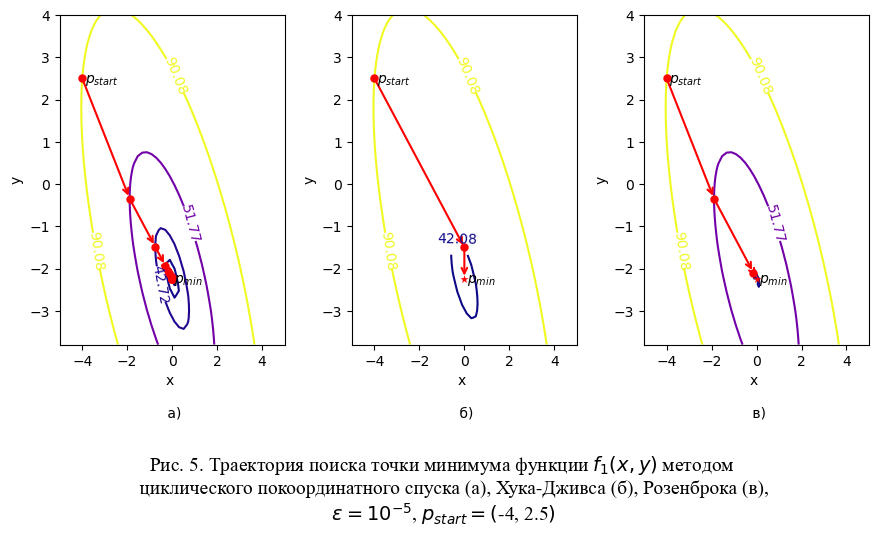

In [89]:
ind += 1
ExperimentPlot(func=f1_pl, xmin=-5, xmax=5, ymin=-3.8, ymax=4, n1=its4_f1, n2=its5_f1,n3=its6_f1,
                   x1=xs4f1, x2=xs5f1, x3=xs6f1,  
                    ind=ind, xstart=-4, ystart=2.5,
                    xspacing=0.1, yspacing=0.1, fnum = 1, eps = 5)

In [90]:
xmin7_f1, fmin7_f1, its7_f1, xs7f1, fcalls7_f1 = InfoCyclicCoordinateDescentMinSearch(f1, [3, -1], eps1)

In [91]:
xmin8_f1, fmin8_f1, its8_f1, xs8f1, fcalls8_f1 = InfoHookeJeevesMinSearch(f1, [3, -1], eps1)

In [92]:
xmin9_f1, fmin9_f1, its9_f1, xs9f1, fcalls9_f1 = InfoRozenbrokMinSearch(f1, [3, -1], eps1)

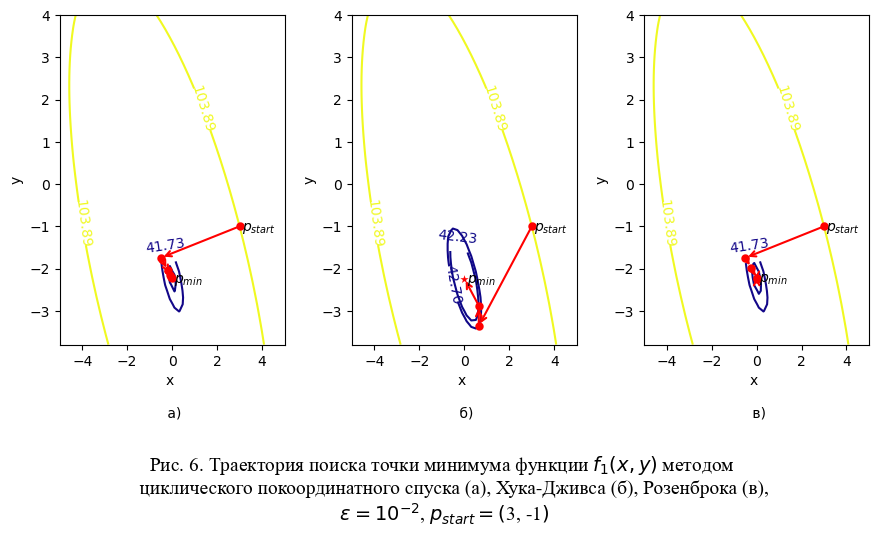

In [93]:
ind += 1
ExperimentPlot(func=f1_pl, xmin=-5, xmax=5, ymin=-3.8, ymax=4, n1=its7_f1, n2=its8_f1,n3=its9_f1,
                   x1=xs7f1, x2=xs8f1, x3=xs9f1,  
                    ind=ind, xstart=3, ystart=-1,
                    xspacing=0.1, yspacing=0.1, fnum = 1, eps = 2)

In [94]:
xmin10_f1, fmin10_f1, its10_f1, xs10f1, fcalls10_f1 = InfoCyclicCoordinateDescentMinSearch(f1, [3, -1], eps2)

In [95]:
xmin11_f1, fmin11_f1, its11_f1, xs11f1, fcalls11_f1 = InfoHookeJeevesMinSearch(f1, [3, -1], eps2)

In [96]:
xmin12_f1, fmin12_f1, its12_f1, xs12f1, fcalls12_f1 = InfoRozenbrokMinSearch(f1, [3, -1], eps2)

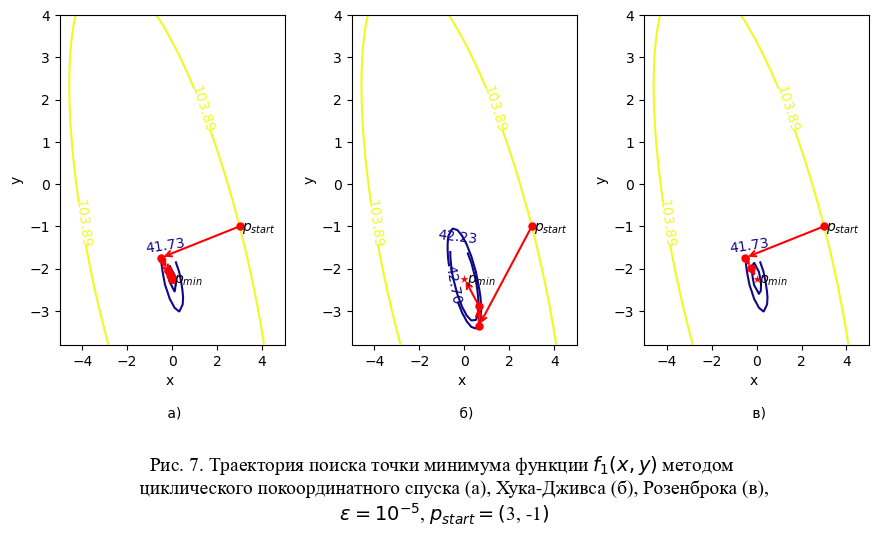

In [97]:
ind += 1
ExperimentPlot(func=f1_pl, xmin=-5, xmax=5, ymin=-3.8, ymax=4, n1=its10_f1, n2=its11_f1,n3=its12_f1,
                   x1=xs10f1, x2=xs11f1, x3=xs12f1,  
                    ind=ind, xstart=3, ystart=-1,
                    xspacing=0.1, yspacing=0.1, fnum = 1, eps = 5)

# функция Розенброка

$\alpha = 1$

In [98]:
xmin1_f21, fmin1_f21, its1_f21, xs1f21, fcalls1_f21 = InfoCyclicCoordinateDescentMinSearch(f21, [-4, 2.5], eps1)

In [99]:
xmin2_f21, fmin2_f21, its2_f21, xs2f21, fcalls2_f21 = InfoHookeJeevesMinSearch(f21, [-4, 2.5], eps1)

In [100]:
xmin3_f21, fmin3_f21, its3_f21, xs3f21, fcalls3_f21 = InfoRozenbrokMinSearch(f21, [-4, 2.5], eps1)

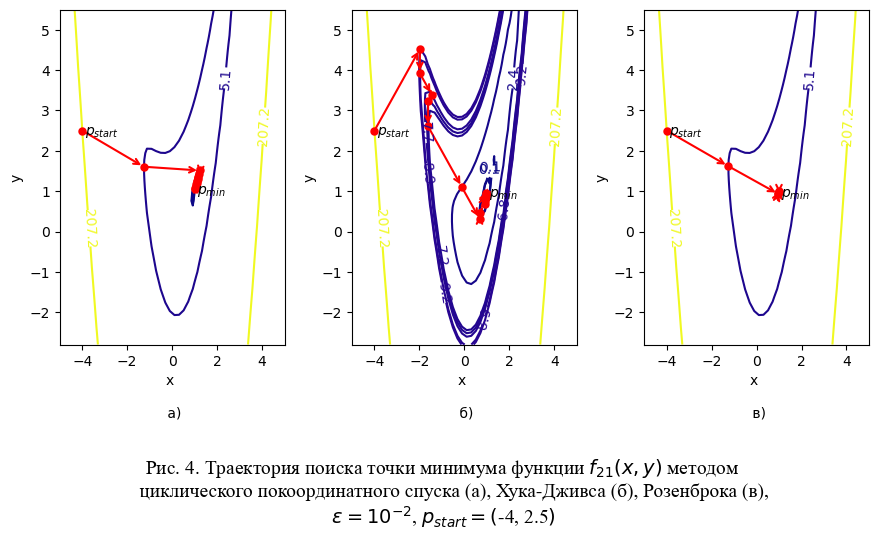

In [101]:
ExperimentPlot(func=f21_pl, xmin=-5, xmax=5, ymin=-2.8, ymax=5.5, n1=its1_f21, n2=its2_f21,n3=its3_f21,
                   x1=xs1f21, x2=xs2f21, x3=xs3f21,  
                    ind=4, xstart=-4, ystart=2.5,
                    xspacing=0.1, yspacing=0.1, fnum = 21, eps = 2)

In [102]:
xmin4_f21, fmin4_f21, its4_f21, xs4f21, fcalls4_f21 = InfoCyclicCoordinateDescentMinSearch(f21, [-4, 2.5], eps2)

In [103]:
xmin5_f21, fmin5_f21, its5_f21, xs5f21, fcalls5_f21 = InfoHookeJeevesMinSearch(f21, [-4, 2.5], eps2)

In [104]:
xmin6_f21, fmin6_f21, its6_f21, xs6f21, fcalls6_f21 = InfoRozenbrokMinSearch(f21, [-4, 2.5], eps2)

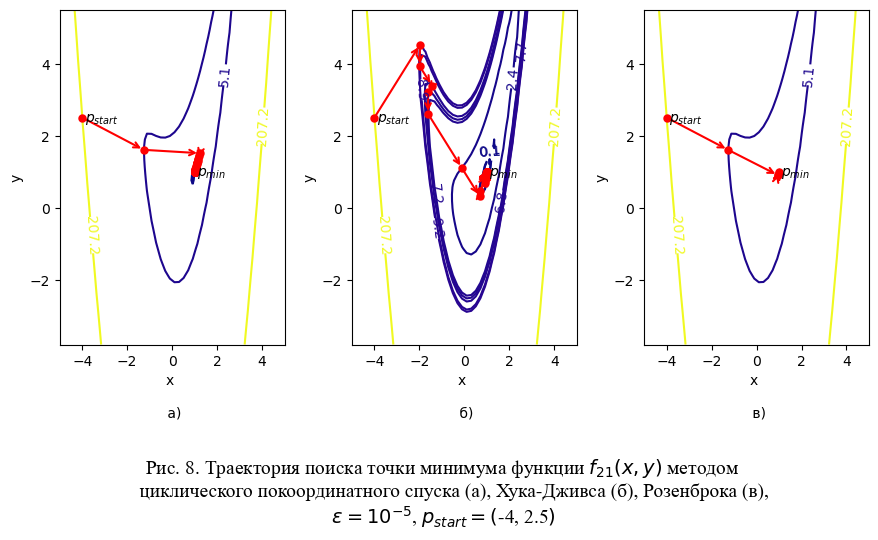

In [105]:
ind += 1
ExperimentPlot(func=f21_pl, xmin=-5, xmax=5, ymin=-3.8, ymax=5.5, n1=its4_f21, n2=its5_f21,n3=its6_f21,
                   x1=xs4f21, x2=xs5f21, x3=xs6f21,  
                    ind=ind, xstart=-4, ystart=2.5,
                    xspacing=0.1, yspacing=0.1, fnum = 21, eps = 5)

In [106]:
xmin7_f21, fmin7_f21, its7_f21, xs7f21, fcalls7_f21 = InfoCyclicCoordinateDescentMinSearch(f21, [3, -1], eps1)

In [107]:
xmin8_f21, fmin8_f21, its8_f21, xs8f21, fcalls8_f21 = InfoHookeJeevesMinSearch(f21, [3, -1], eps1)

In [108]:
xmin9_f21, fmin9_f21, its9_f21, xs9f21, fcalls9_f21 = InfoRozenbrokMinSearch(f21, [3, -1], eps1)

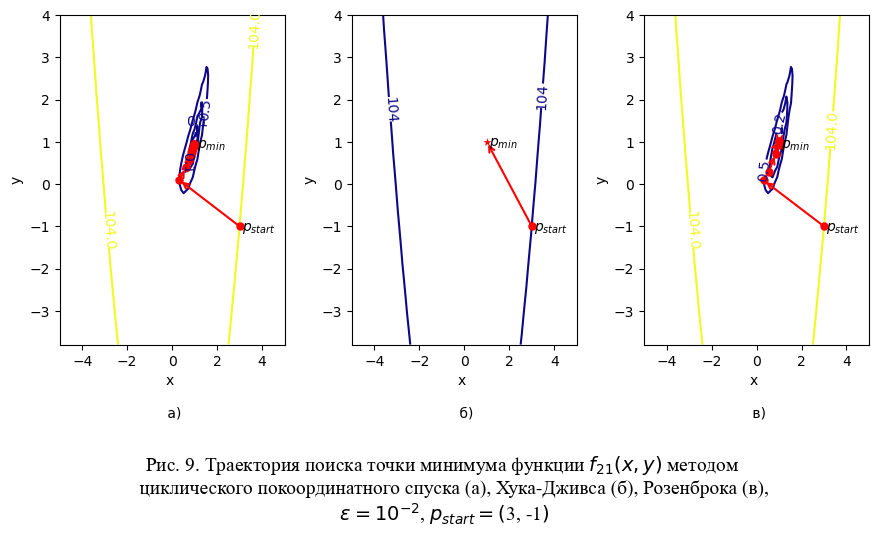

In [109]:
ind += 1
ExperimentPlot(func=f21_pl, xmin=-5, xmax=5, ymin=-3.8, ymax=4, n1=its7_f21, n2=its8_f21,n3=its9_f21,
                   x1=xs7f21, x2=xs8f21, x3=xs9f21,  
                    ind=ind, xstart=3, ystart=-1,
                    xspacing=0.1, yspacing=0.1, fnum = 21, eps = 2)

In [110]:
xmin10_f21, fmin10_f21, its10_f21, xs10f21, fcalls10_f21 = InfoCyclicCoordinateDescentMinSearch(f21, [3, -1], eps2)

In [111]:
xmin11_f21, fmin11_f21, its11_f21, xs11f21, fcalls11_f21 = InfoHookeJeevesMinSearch(f21, [3, -1], eps2)

In [112]:
xmin12_f21, fmin12_f21, its12_f21, xs12f21, fcalls12_f21 = InfoRozenbrokMinSearch(f21, [3, -1], eps2)

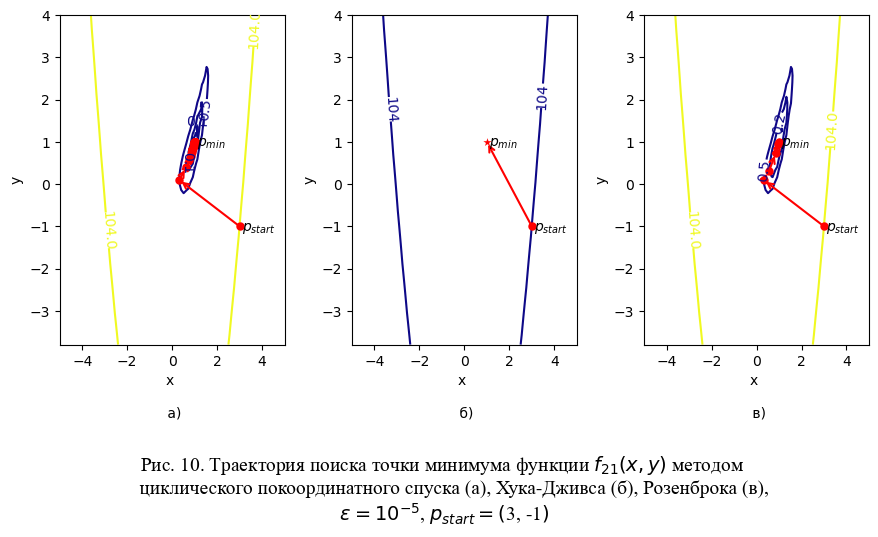

In [113]:
ind += 1
ExperimentPlot(func=f21_pl, xmin=-5, xmax=5, ymin=-3.8, ymax=4, n1=its10_f21, n2=its11_f21,n3=its12_f21,
                   x1=xs10f21, x2=xs11f21, x3=xs12f21,  
                    ind=ind, xstart=3, ystart=-1,
                    xspacing=0.1, yspacing=0.1, fnum = 21, eps = 5)

$\alpha = 20$

In [114]:
xmin1_f22, fmin1_f22, its1_f22, xs1f22, fcalls1_f22 = InfoCyclicCoordinateDescentMinSearch(f22, [-4, 2.5], eps1)

In [115]:
xmin2_f22, fmin2_f22, its2_f22, xs2f22, fcalls2_f22 = InfoHookeJeevesMinSearch(f22, [-4, 2.5], eps1)

In [116]:
xmin3_f22, fmin3_f22, its3_f22, xs3f22, fcalls3_f22 = InfoRozenbrokMinSearch(f22, [-4, 2.5], eps1)

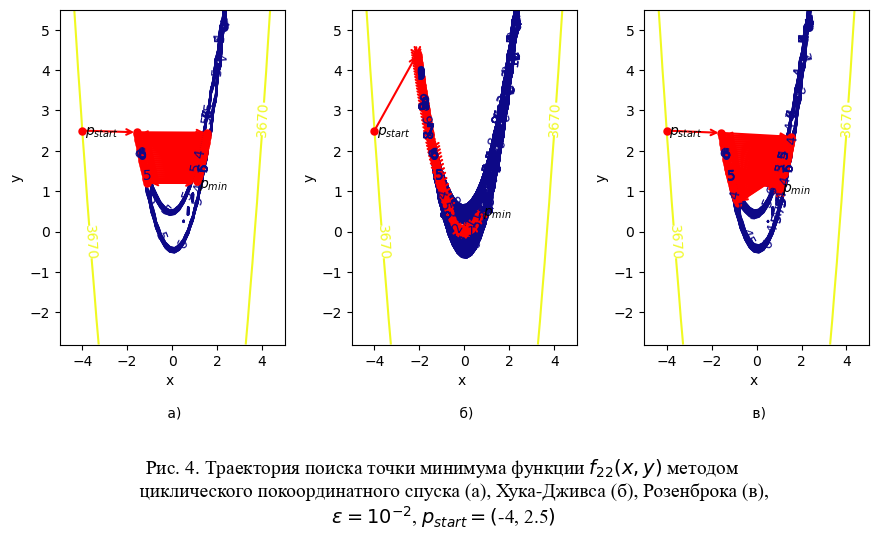

In [117]:
ExperimentPlot(func=f22_pl, xmin=-5, xmax=5, ymin=-2.8, ymax=5.5, n1=its1_f22, n2=its2_f22,n3=its3_f22,
                   x1=xs1f22, x2=xs2f22, x3=xs3f22,  
                    ind=4, xstart=-4, ystart=2.5,
                    xspacing=0.1, yspacing=0.1, fnum = 22, eps = 2)

In [118]:
xmin4_f22, fmin4_f22, its4_f22, xs4f22, fcalls4_f22 = InfoCyclicCoordinateDescentMinSearch(f22, [-4, 2.5], eps2)

In [119]:
xmin5_f22, fmin5_f22, its5_f22, xs5f22, fcalls5_f22 = InfoHookeJeevesMinSearch(f22, [-4, 2.5], eps2)

In [120]:
xmin6_f22, fmin6_f22, its6_f22, xs6f22, fcalls6_f22 = InfoRozenbrokMinSearch(f22, [-4, 2.5], eps2)

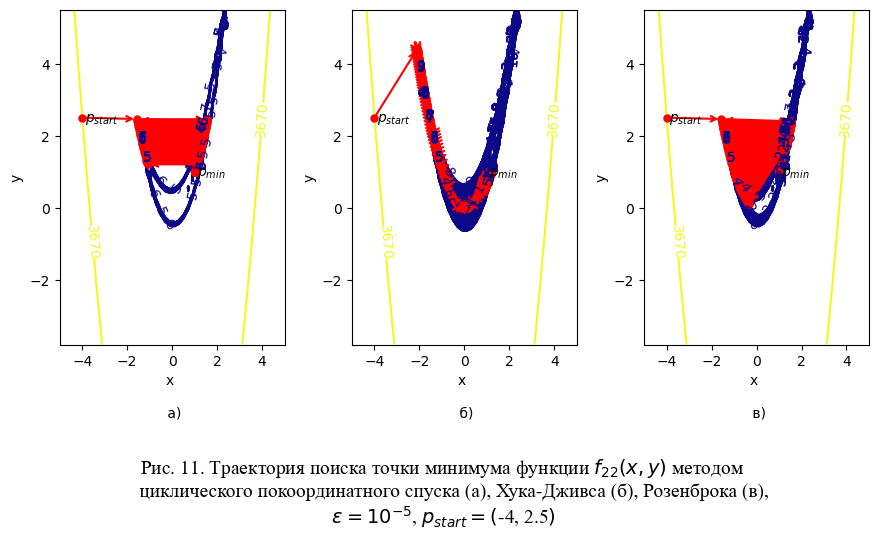

In [121]:
ind += 1
ExperimentPlot(func=f22_pl, xmin=-5, xmax=5, ymin=-3.8, ymax=5.5, n1=its4_f22, n2=its5_f22,n3=its6_f22,
                   x1=xs4f22, x2=xs5f22, x3=xs6f22,  
                    ind=ind, xstart=-4, ystart=2.5,
                    xspacing=0.1, yspacing=0.1, fnum = 22, eps = 5)

In [122]:
xmin7_f22, fmin7_f22, its7_f22, xs7f22, fcalls7_f22 = InfoCyclicCoordinateDescentMinSearch(f22, [3, -1], eps1)

In [123]:
xmin8_f22, fmin8_f22, its8_f22, xs8f22, fcalls8_f22 = InfoHookeJeevesMinSearch(f22, [3, -1], eps1)

In [124]:
xmin9_f22, fmin9_f22, its9_f22, xs9f22, fcalls9_f22 = InfoRozenbrokMinSearch(f22, [3, -1], eps1)

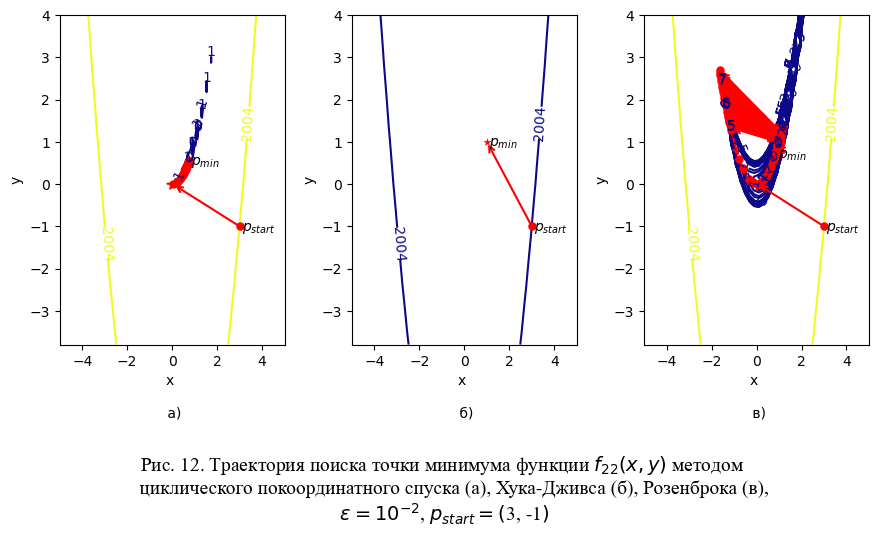

In [125]:
ind += 1
ExperimentPlot(func=f22_pl, xmin=-5, xmax=5, ymin=-3.8, ymax=4, n1=its7_f22, n2=its8_f22,n3=its9_f22,
                   x1=xs7f22, x2=xs8f22, x3=xs9f22,  
                    ind=ind, xstart=3, ystart=-1,
                    xspacing=0.1, yspacing=0.1, fnum = 22, eps = 2)

In [126]:
xmin10_f22, fmin10_f22, its10_f22, xs10f22, fcalls10_f22 = InfoCyclicCoordinateDescentMinSearch(f22, [3, -1], eps2)

In [127]:
xmin11_f22, fmin11_f22, its11_f22, xs11f22, fcalls11_f22 = InfoHookeJeevesMinSearch(f22, [3, -1], eps2)

In [128]:
xmin12_f22, fmin12_f22, its12_f22, xs12f22, fcalls12_f22 = InfoRozenbrokMinSearch(f22, [3, -1], eps2)

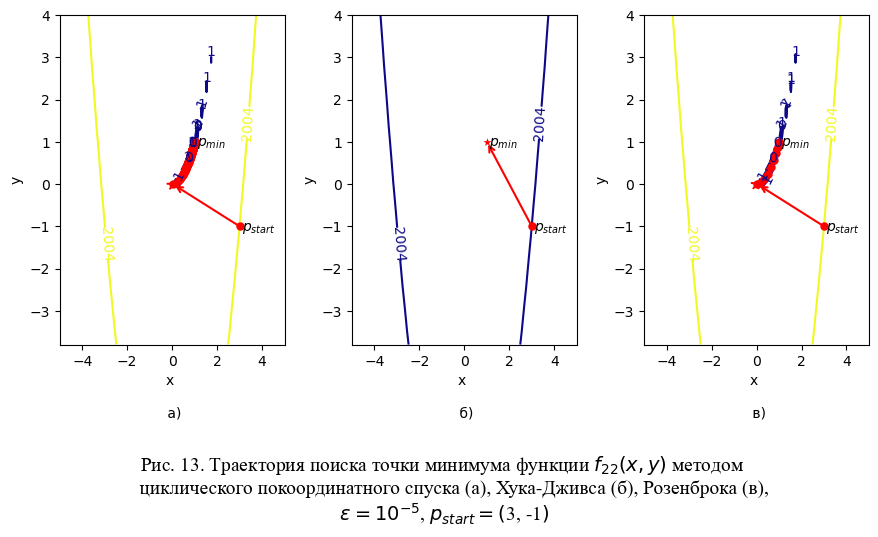

In [129]:
ind += 1
ExperimentPlot(func=f22_pl, xmin=-5, xmax=5, ymin=-3.8, ymax=4, n1=its10_f22, n2=its11_f22,n3=its12_f22,
                   x1=xs10f22, x2=xs11f22, x3=xs12f22,  
                    ind=ind, xstart=3, ystart=-1,
                    xspacing=0.1, yspacing=0.1, fnum = 22, eps = 5)

In [130]:
import pandas as pd
from IPython.display import HTML

#         # точность / нач точка / кол-во итераций / кол-во вычисленных значений / точка минимума / мин знач / 


its = [its1_f1, its2_f1, its3_f1, its4_f1, its5_f1, its6_f1, its7_f1, its8_f1, its9_f1, its10_f1, its11_f1, its12_f1, 
        its1_f21, its2_f21, its3_f21, its4_f21, its5_f21, its6_f21, its7_f21, its8_f21, its9_f21, its10_f21, its11_f21, its12_f21, 
        its1_f22, its2_f22, its3_f22, its4_f22, its5_f22, its6_f22, its7_f22, its8_f22, its9_f22,
        its10_f22, its11_f22, its12_f22, ]
fls =[fcalls1_f1, fcalls2_f1, fcalls3_f1, fcalls4_f1, fcalls5_f1, fcalls6_f1, fcalls7_f1, fcalls8_f1, fcalls9_f1, 
      fcalls10_f1, fcalls11_f1, fcalls12_f1, 
        fcalls1_f21, fcalls2_f21, fcalls3_f21, fcalls4_f21, fcalls5_f21, fcalls6_f21, fcalls7_f21, fcalls8_f21,
      fcalls9_f21, fcalls10_f21, fcalls11_f21, fcalls12_f21, 
        fcalls1_f22, fcalls2_f22, fcalls3_f22, fcalls4_f22, fcalls5_f22, fcalls6_f22, fcalls7_f22, fcalls8_f22, fcalls9_f22,
        fcalls10_f22, fcalls11_f22, fcalls12_f22, ]

its1 = [its1_f1, its4_f1, its7_f1, its10_f1, 
        its1_f21, its4_f21, its7_f21, its10_f21, 
        its1_f22, its4_f22, its7_f22, its10_f22]

fls1 = [fcalls1_f1, fcalls4_f1, fcalls7_f1, fcalls10_f1, 
        fcalls1_f21, fcalls4_f21, fcalls7_f21, fcalls10_f21, 
        fcalls1_f22, fcalls4_f22, fcalls7_f22, fcalls10_f22]


xmins1 = [xmin1_f1[0], xmin4_f1[0], xmin7_f1[0], xmin10_f1[0], 
          xmin1_f21[0], xmin4_f21[0], xmin7_f21[0], xmin10_f21[0], 
          xmin1_f22[0], xmin4_f22[0], xmin7_f22[0], xmin10_f22[0]]
ymins1 = [xmin1_f1[1], xmin4_f1[1], xmin7_f1[1], xmin10_f1[1], 
          xmin1_f21[1], xmin4_f21[1], xmin7_f21[1], xmin10_f21[1], 
          xmin1_f22[1], xmin4_f22[1], xmin7_f22[1], xmin10_f22[1]]
fmins1 = [fmin1_f1, fmin4_f1, fmin7_f1, fmin10_f1, 
          fmin1_f21, fmin4_f21, fmin7_f21, fmin10_f21, 
          fmin1_f22, fmin4_f22, fmin7_f22, fmin10_f22]

funcs = ['f1(x, y)','f1(x, y)','f1(x, y)','f1(x, y)',
         'f21(x, y)', 'f21(x, y)','f21(x, y)', 'f21(x, y)',
         'f22(x, y)','f22(x, y)', 'f22(x, y)','f22(x, y)']
prec = [format(el, '0.1e') for el in [eps1, eps2]]
df1 = pd.DataFrame({"Функция": funcs,
                    "Точность": [prec[0], prec[1], prec[0], prec[1],prec[0], prec[1],
                                prec[0], prec[1], prec[0], prec[1], prec[0], prec[1]],
                    "Начальная точка": ['(-4, 2.5)', '(-4, 2.5)', '(3, -1)', '(3, -1)', '(-4, 2.5)', '(-4, 2.5)', 
                                        '(3, -1)',  '(3, -1)', '(-4, 2.5)', '(-4, 2.5)', '(3, -1)',  '(3, -1)',],
                    "Кол-во итераций": [elem for elem in its1], 
                    "Кол-во вычисленных значений целевой функции": [elem for elem in fls1],
                    "Точка минимума": [f'({xmins1[0]: 0.2f}, {ymins1[0]: 0.2f})',
                                     f'({xmins1[1]: 0.5f}, {ymins1[1]: 0.5f})',
                                     f'({xmins1[2]: 0.2f}, {ymins1[2]: 0.2f})',
                                     f'({xmins1[3]: 0.5f}, {ymins1[3]: 0.5f})',
                                     f'({xmins1[4]: 0.2f}, {ymins1[4]: 0.2f})',
                                     f'({xmins1[5]: 0.5f}, {ymins1[5]: 0.5f})',
                                     f'({xmins1[6]: 0.2f}, {ymins1[6]: 0.2f})',
                                     f'({xmins1[7]: 0.5f}, {ymins1[7]: 0.5f})',
                                     f'({xmins1[8]: 0.2f}, {ymins1[8]: 0.2f})',
                                     f'({xmins1[9]: 0.5f}, {ymins1[9]: 0.5f})',
                                     f'({xmins1[10]: 0.2f}, {ymins1[10]: 0.2f})',
                                     f'({xmins1[11]: 0.5f}, {ymins1[11]: 0.5f})'],
                    "Минимальное значение функции": [f'{fmins1[0]: 0.2f}',
                                                f'{fmins1[1]: 0.5f}',
                                                f'{fmins1[2]: 0.2f}',
                                                f'{fmins1[3]: 0.5f}',
                                                f'{fmins1[4]: 0.2f}',
                                                f'{fmins1[5]: 0.5f}',
                                                f'{fmins1[6]: 0.2f}',
                                                f'{fmins1[7]: 0.5f}',
                                                f'{fmins1[8]: 0.2f}',
                                                f'{fmins1[9]: 0.5f}',
                                                f'{fmins1[10]: 0.2f}',
                                                f'{fmins1[11]: 0.5f}']
                   })
s = df1.style.hide(axis="index").set_caption("Табл. 1. Результаты поиска минимумов функций методом циклического координатного спуска")
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
s.set_table_styles([cell_hover, headers])
s.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.4em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold; font-size: 16px;'},
    #{'selector': 'td:nth-child(4)', 'props': 'text-align: left; font-weight: bold; font-size: 16px'},
    #{'selector': 'td:nth-child(5)', 'props': 'text-align: left; font-weight: bold; font-size: 16px;'},
    {'selector': 'caption', 'props': [('color', 'black'),('font-size', '18px'),('text-align','right'),
                                     ('font-family', 'Times New Roman')]},
], overwrite=False)
s.set_table_styles([{'selector': 'th', 'props': 'border-left: 1px solid white'},
            {'selector': 'td', 'props': 'border-left: 1px solid #000066'}], overwrite=False)

s

Функция,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Точка минимума,Минимальное значение функции
"f1(x, y)",1.0e-02,"(-4, 2.5)",7,353,"(-0.00, -2.23)",41.00
"f1(x, y)",1.0e-05,"(-4, 2.5)",15,1153,"(-0.00000, -2.23607)",41.00000
"f1(x, y)",1.0e-02,"(3, -1)",6,309,"(-0.00, -2.23)",41.00
"f1(x, y)",1.0e-05,"(3, -1)",13,1009,"(-0.00000, -2.23606)",41.00000
"f21(x, y)",1.0e-02,"(-4, 2.5)",14,661,"( 1.02, 1.04)",0.00
"f21(x, y)",1.0e-05,"(-4, 2.5)",46,3385,"( 1.00002, 1.00003)",0.00000
"f21(x, y)",1.0e-02,"(3, -1)",13,617,"( 0.99, 0.97)",0.00
"f21(x, y)",1.0e-05,"(3, -1)",43,3169,"( 0.99998, 0.99996)",0.00000
"f22(x, y)",1.0e-02,"(-4, 2.5)",52,2333,"( 1.10, 1.20)",0.01
"f22(x, y)",1.0e-05,"(-4, 2.5)",515,37153,"( 1.00037, 1.00073)",0.00000


In [131]:

its2 = [its2_f1, its5_f1, its8_f1, its11_f1, 
        its2_f21, its5_f21, its8_f21, its11_f21, 
        its2_f22, its5_f22, its8_f22, its11_f22]

fls2 = [fcalls2_f1, fcalls5_f1, fcalls8_f1, fcalls11_f1, 
        fcalls2_f21, fcalls5_f21, fcalls8_f21, fcalls11_f21, 
        fcalls2_f22, fcalls5_f22, fcalls8_f22, fcalls11_f22]


xmins2 = [xmin2_f1[0], xmin5_f1[0], xmin8_f1[0], xmin11_f1[0], 
          xmin2_f21[0], xmin5_f21[0], xmin8_f21[0], xmin11_f21[0], 
          xmin2_f22[0], xmin5_f22[0], xmin8_f22[0], xmin11_f22[0]]

ymins2 = [xmin2_f1[1], xmin5_f1[1], xmin8_f1[1], xmin11_f1[1], 
          xmin2_f21[1], xmin5_f21[1], xmin8_f21[1], xmin11_f21[1], 
          xmin2_f22[1], xmin5_f22[1], xmin8_f22[1], xmin11_f22[1]]

fmins2 = [fmin2_f1, fmin5_f1, fmin8_f1, fmin11_f1, 
          fmin2_f21, fmin5_f21, fmin8_f21, fmin11_f21, 
          fmin2_f22, fmin5_f22, fmin8_f22, fmin11_f22]

df2 = pd.DataFrame({"Функция": funcs,
                    "Точность": [prec[0], prec[1], prec[0], prec[1],prec[0], prec[1],
                                prec[0], prec[1], prec[0], prec[1], prec[0], prec[1]],
                    "Начальная точка": ['(-4, 2.5)', '(-4, 2.5)', '(3, -1)', '(3, -1)', '(-4, 2.5)', '(-4, 2.5)', 
                                        '(3, -1)',  '(3, -1)', '(-4, 2.5)', '(-4, 2.5)', '(3, -1)',  '(3, -1)',],
                    "Кол-во итераций": [elem for elem in its1], 
                    "Кол-во вычисленных значений целевой функции": [elem for elem in fls2],
                    "Точка минимума": [f'({xmins2[0]: 0.2f}, {ymins2[0]: 0.2f})',
                                     f'({xmins2[1]: 0.5f}, {ymins2[1]: 0.5f})',
                                     f'({xmins2[2]: 0.2f}, {ymins2[2]: 0.2f})',
                                     f'({xmins2[3]: 0.5f}, {ymins2[3]: 0.5f})',
                                     f'({xmins2[4]: 0.2f}, {ymins2[4]: 0.2f})',
                                     f'({xmins2[5]: 0.5f}, {ymins2[5]: 0.5f})',
                                     f'({xmins2[6]: 0.2f}, {ymins2[6]: 0.2f})',
                                     f'({xmins2[7]: 0.5f}, {ymins2[7]: 0.5f})',
                                     f'({xmins2[8]: 0.2f}, {ymins2[8]: 0.2f})',
                                     f'({xmins2[9]: 0.5f}, {ymins2[9]: 0.5f})',
                                     f'({xmins2[10]: 0.2f}, {ymins2[10]: 0.2f})',
                                     f'({xmins2[11]: 0.5f}, {ymins2[11]: 0.5f})'],
                    "Минимальное значение функции": [f'{fmins2[0]: 0.2f}',
                                                f'{fmins2[1]: 0.5f}',
                                                f'{fmins2[2]: 0.2f}',
                                                f'{fmins2[3]: 0.5f}',
                                                f'{fmins2[4]: 0.2f}',
                                                f'{fmins2[5]: 0.5f}',
                                                f'{fmins2[6]: 0.2f}',
                                                f'{fmins2[7]: 0.5f}',
                                                f'{fmins2[8]: 0.2f}',
                                                f'{fmins2[9]: 0.5f}',
                                                f'{fmins2[10]: 0.2f}',
                                                f'{fmins2[11]: 0.5f}']
                   })
s1 = df2.style.hide(axis="index").set_caption("Табл. 2. Результаты поиска минимумов функций методом Хука-Дживса")
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
s1.set_table_styles([cell_hover, headers])
s1.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.4em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold; font-size: 16px;'},
    #{'selector': 'td:nth-child(4)', 'props': 'text-align: left; font-weight: bold; font-size: 16px'},
    #{'selector': 'td:nth-child(5)', 'props': 'text-align: left; font-weight: bold; font-size: 16px;'},
    {'selector': 'caption', 'props': [('color', 'black'),('font-size', '18px'),('text-align','right'),
                                     ('font-family', 'Times New Roman')]},
], overwrite=False)
s1.set_table_styles([{'selector': 'th', 'props': 'border-left: 1px solid white'},
            {'selector': 'td', 'props': 'border-left: 1px solid #000066'}], overwrite=False)

s1

Функция,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Точка минимума,Минимальное значение функции
"f1(x, y)",1.0e-02,"(-4, 2.5)",7,60,"(-0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(-4, 2.5)",15,100,"(-0.00000, -2.23607)",41.00000
"f1(x, y)",1.0e-02,"(3, -1)",6,68,"(-0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(3, -1)",13,108,"(-0.00000, -2.23607)",41.00000
"f21(x, y)",1.0e-02,"(-4, 2.5)",14,92,"( 0.99, 0.98)",0.00
"f21(x, y)",1.0e-05,"(-4, 2.5)",46,212,"( 0.99999, 0.99998)",0.00000
"f21(x, y)",1.0e-02,"(3, -1)",13,56,"( 1.00, 1.00)",0.00
"f21(x, y)",1.0e-05,"(3, -1)",43,108,"( 1.00000, 1.00000)",0.00000
"f22(x, y)",1.0e-02,"(-4, 2.5)",52,528,"( 0.71, 0.50)",0.08
"f22(x, y)",1.0e-05,"(-4, 2.5)",515,2216,"( 0.99942, 0.99884)",0.00000


In [132]:

its3 = [its3_f1, its6_f1, its9_f1, its12_f1, 
        its3_f21, its6_f21, its9_f21, its12_f21, 
        its3_f22, its6_f22, its9_f22, its12_f22]

fls3 = [fcalls3_f1, fcalls6_f1, fcalls9_f1, fcalls12_f1, 
        fcalls3_f21, fcalls6_f21, fcalls9_f21, fcalls12_f21, 
        fcalls3_f22, fcalls6_f22, fcalls9_f22, fcalls12_f22]


xmins3 = [xmin3_f1[0], xmin6_f1[0], xmin9_f1[0], xmin12_f1[0], 
          xmin3_f21[0], xmin6_f21[0], xmin9_f21[0], xmin12_f21[0], 
          xmin3_f22[0], xmin6_f22[0], xmin9_f22[0], xmin12_f22[0]]

ymins3 = [xmin3_f1[1], xmin6_f1[1], xmin9_f1[1], xmin12_f1[1], 
          xmin3_f21[1], xmin6_f21[1], xmin9_f21[1], xmin12_f21[1], 
          xmin3_f22[1], xmin6_f22[1], xmin9_f22[1], xmin12_f22[1]]

fmins3 = [fmin3_f1, fmin6_f1, fmin9_f1, fmin12_f1, 
          fmin3_f21, fmin6_f21, fmin9_f21, fmin12_f21, 
          fmin3_f22, fmin6_f22, fmin9_f22, fmin12_f22]

df3 = pd.DataFrame({"Функция": funcs,
                    "Точность": [prec[0], prec[1], prec[0], prec[1],prec[0], prec[1],
                                prec[0], prec[1], prec[0], prec[1], prec[0], prec[1]],
                    "Начальная точка": ['(-4, 2.5)', '(-4, 2.5)', '(3, -1)', '(3, -1)', '(-4, 2.5)', '(-4, 2.5)', 
                                        '(3, -1)',  '(3, -1)', '(-4, 2.5)', '(-4, 2.5)', '(3, -1)',  '(3, -1)',],
                    "Кол-во итераций": [elem for elem in its1], 
                    "Кол-во вычисленных значений целевой функции": [elem for elem in fls3],
                    "Точка минимума": [f'({xmins3[0]: 0.2f}, {ymins3[0]: 0.2f})',
                                     f'({xmins3[1]: 0.5f}, {ymins3[1]: 0.5f})',
                                     f'({xmins3[2]: 0.2f}, {ymins3[2]: 0.2f})',
                                     f'({xmins3[3]: 0.5f}, {ymins3[3]: 0.5f})',
                                     f'({xmins3[4]: 0.2f}, {ymins3[4]: 0.2f})',
                                     f'({xmins3[5]: 0.5f}, {ymins3[5]: 0.5f})',
                                     f'({xmins3[6]: 0.2f}, {ymins3[6]: 0.2f})',
                                     f'({xmins3[7]: 0.5f}, {ymins3[7]: 0.5f})',
                                     f'({xmins3[8]: 0.2f}, {ymins3[8]: 0.2f})',
                                     f'({xmins3[9]: 0.5f}, {ymins3[9]: 0.5f})',
                                     f'({xmins3[10]: 0.2f}, {ymins3[10]: 0.2f})',
                                     f'({xmins3[11]: 0.5f}, {ymins3[11]: 0.5f})'],
                    "Минимальное значение функции": [f'{fmins3[0]: 0.2f}',
                                                f'{fmins3[1]: 0.5f}',
                                                f'{fmins3[2]: 0.2f}',
                                                f'{fmins3[3]: 0.5f}',
                                                f'{fmins3[4]: 0.2f}',
                                                f'{fmins3[5]: 0.5f}',
                                                f'{fmins3[6]: 0.2f}',
                                                f'{fmins3[7]: 0.5f}',
                                                f'{fmins3[8]: 0.2f}',
                                                f'{fmins3[9]: 0.5f}',
                                                f'{fmins3[10]: 0.2f}',
                                                f'{fmins3[11]: 0.5f}']
                   })
s2 = df3.style.hide(axis="index").set_caption("Табл. 3. Результаты поиска минимумов функций методом Розенброка")
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
s2.set_table_styles([cell_hover, headers])
s2.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.4em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold; font-size: 16px;'},
    #{'selector': 'td:nth-child(4)', 'props': 'text-align: left; font-weight: bold; font-size: 16px'},
    #{'selector': 'td:nth-child(5)', 'props': 'text-align: left; font-weight: bold; font-size: 16px;'},
    {'selector': 'caption', 'props': [('color', 'black'),('font-size', '18px'),('text-align','right'),
                                     ('font-family', 'Times New Roman')]},
], overwrite=False)
s2.set_table_styles([{'selector': 'th', 'props': 'border-left: 1px solid white'},
            {'selector': 'td', 'props': 'border-left: 1px solid #000066'}], overwrite=False)

s2

Функция,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Точка минимума,Минимальное значение функции
"f1(x, y)",1.0e-02,"(-4, 2.5)",7,73,"(-0.00, -2.26)",41.00
"f1(x, y)",1.0e-05,"(-4, 2.5)",15,105,"(-0.00000, -2.23608)",41.00000
"f1(x, y)",1.0e-02,"(3, -1)",6,73,"(-0.00, -2.21)",41.00
"f1(x, y)",1.0e-05,"(3, -1)",13,105,"( 0.00000, -2.23608)",41.00000
"f21(x, y)",1.0e-02,"(-4, 2.5)",14,85,"( 0.99, 0.96)",0.00
"f21(x, y)",1.0e-05,"(-4, 2.5)",46,157,"( 1.00000, 1.00002)",0.00000
"f21(x, y)",1.0e-02,"(3, -1)",13,109,"( 0.99, 0.96)",0.00
"f21(x, y)",1.0e-05,"(3, -1)",43,183,"( 1.00000, 0.99999)",0.00000
"f22(x, y)",1.0e-02,"(-4, 2.5)",52,12001,"( 1.03, 1.09)",0.01
"f22(x, y)",1.0e-05,"(-4, 2.5)",515,3953,"( 1.00000, 1.00000)",0.00000


# Выводы

Из результатов, представленных в таблицах 1-3, можно сделать следующие выводы.

В результате численных экспериментов были сделаны следующие выводы. 

Во-первых, на стоимость обоих методов влияет точность поиска: с повышением этого параметра увеличивается количество вычисленных значений целевой функции и градиента.

Во-вторых, выбор начальной точки также оказывает существенное влияние на стоимость: при улучшении начального приближения (уменьшении нормы вектора $\|\vec r_{p_{start}}-\vec r_{p_{min}}\|$ ) число вычисленных значений целевой функции и градиента уменьшается.

В-третьих, необходимо учитывать и выпуклость функции при теоретической оценке стоимости метода. Из экспериментов видно, что при переходе от квадратичной функции к функции Розенброка увеличивается число вычисленных значений целевой функции и градиента.

В-четвёртых, нужно иметь ввиду и овражность функции. Так, в ходе эксперимента было установлено, что при повышении параметра овражности $\alpha$ функции Розенброка увеличивается число вычислений целевой функции для поиска минимума.

Сравним реализованные методы между собой: 

1) Для квадратичной функции наиболее эффективным оказался метод Хука-Дживса. По сравнению с методом циклического координатного спуска он требует в 5.8 раз меньше вычислений целевой функции (точность $\varepsilon = 10^{-2}$), а иногда и в 10 раз меньше  (точность $\varepsilon = 10^{-5}$). По сравнению с методом Розенброка метод Хука-Дживса уменьшает число вычислений функции примерно в 3 раза для каждой из точности.

2) Для функции Розеброка метод Хука-Дживса также является наименее ресурсозатратным. По сравнению с методом циклического координатного спуска он требует в 5-10 раз меньше вычислений целевой функции (точность $\varepsilon = 10^{-2}$), а иногда и в 344 раз меньше  ($\alpha = 20$, нач. точка $(3, -1)$, точность $\varepsilon = 10^{-5}$). По сравнению с методом Розенброка метод Хука-Дживса уменьшает число вычислений функции примерно в 10 раз для каждой из точности.

In [133]:
s

Функция,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Точка минимума,Минимальное значение функции
"f1(x, y)",1.0e-02,"(-4, 2.5)",7,353,"(-0.00, -2.23)",41.00
"f1(x, y)",1.0e-05,"(-4, 2.5)",15,1153,"(-0.00000, -2.23607)",41.00000
"f1(x, y)",1.0e-02,"(3, -1)",6,309,"(-0.00, -2.23)",41.00
"f1(x, y)",1.0e-05,"(3, -1)",13,1009,"(-0.00000, -2.23606)",41.00000
"f21(x, y)",1.0e-02,"(-4, 2.5)",14,661,"( 1.02, 1.04)",0.00
"f21(x, y)",1.0e-05,"(-4, 2.5)",46,3385,"( 1.00002, 1.00003)",0.00000
"f21(x, y)",1.0e-02,"(3, -1)",13,617,"( 0.99, 0.97)",0.00
"f21(x, y)",1.0e-05,"(3, -1)",43,3169,"( 0.99998, 0.99996)",0.00000
"f22(x, y)",1.0e-02,"(-4, 2.5)",52,2333,"( 1.10, 1.20)",0.01
"f22(x, y)",1.0e-05,"(-4, 2.5)",515,37153,"( 1.00037, 1.00073)",0.00000


In [134]:
s1

Функция,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Точка минимума,Минимальное значение функции
"f1(x, y)",1.0e-02,"(-4, 2.5)",7,60,"(-0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(-4, 2.5)",15,100,"(-0.00000, -2.23607)",41.00000
"f1(x, y)",1.0e-02,"(3, -1)",6,68,"(-0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(3, -1)",13,108,"(-0.00000, -2.23607)",41.00000
"f21(x, y)",1.0e-02,"(-4, 2.5)",14,92,"( 0.99, 0.98)",0.00
"f21(x, y)",1.0e-05,"(-4, 2.5)",46,212,"( 0.99999, 0.99998)",0.00000
"f21(x, y)",1.0e-02,"(3, -1)",13,56,"( 1.00, 1.00)",0.00
"f21(x, y)",1.0e-05,"(3, -1)",43,108,"( 1.00000, 1.00000)",0.00000
"f22(x, y)",1.0e-02,"(-4, 2.5)",52,528,"( 0.71, 0.50)",0.08
"f22(x, y)",1.0e-05,"(-4, 2.5)",515,2216,"( 0.99942, 0.99884)",0.00000


In [135]:
s2

Функция,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Точка минимума,Минимальное значение функции
"f1(x, y)",1.0e-02,"(-4, 2.5)",7,73,"(-0.00, -2.26)",41.00
"f1(x, y)",1.0e-05,"(-4, 2.5)",15,105,"(-0.00000, -2.23608)",41.00000
"f1(x, y)",1.0e-02,"(3, -1)",6,73,"(-0.00, -2.21)",41.00
"f1(x, y)",1.0e-05,"(3, -1)",13,105,"( 0.00000, -2.23608)",41.00000
"f21(x, y)",1.0e-02,"(-4, 2.5)",14,85,"( 0.99, 0.96)",0.00
"f21(x, y)",1.0e-05,"(-4, 2.5)",46,157,"( 1.00000, 1.00002)",0.00000
"f21(x, y)",1.0e-02,"(3, -1)",13,109,"( 0.99, 0.96)",0.00
"f21(x, y)",1.0e-05,"(3, -1)",43,183,"( 1.00000, 0.99999)",0.00000
"f22(x, y)",1.0e-02,"(-4, 2.5)",52,12001,"( 1.03, 1.09)",0.01
"f22(x, y)",1.0e-05,"(-4, 2.5)",515,3953,"( 1.00000, 1.00000)",0.00000


In [136]:
df4 = pd.DataFrame({"Функция": funcs,
                    "Точность": [prec[0], prec[1], prec[0], prec[1],prec[0], prec[1],
                                prec[0], prec[1], prec[0], prec[1], prec[0], prec[1]],
                    "Начальная точка": ['(-4, 2.5)', '(-4, 2.5)', '(3, -1)', '(3, -1)', '(-4, 2.5)', '(-4, 2.5)', 
                                        '(3, -1)',  '(3, -1)', '(-4, 2.5)', '(-4, 2.5)', '(3, -1)',  '(3, -1)',],
                    "Кол-во итераций": [elem for elem in its1], 
                    "Кол-во вычисленных значений целевой функции (Хук-Дживс)": [elem for elem in fls2],
                     "Кол-во вычисленных значений целевой функции (Розенброк)": [elem for elem in fls3],
                    "Точка минимума": [f'({xmins3[0]: 0.2f}, {ymins3[0]: 0.2f})',
                                     f'({xmins3[1]: 0.5f}, {ymins3[1]: 0.5f})',
                                     f'({xmins3[2]: 0.2f}, {ymins3[2]: 0.2f})',
                                     f'({xmins3[3]: 0.5f}, {ymins3[3]: 0.5f})',
                                     f'({xmins3[4]: 0.2f}, {ymins3[4]: 0.2f})',
                                     f'({xmins3[5]: 0.5f}, {ymins3[5]: 0.5f})',
                                     f'({xmins3[6]: 0.2f}, {ymins3[6]: 0.2f})',
                                     f'({xmins3[7]: 0.5f}, {ymins3[7]: 0.5f})',
                                     f'({xmins3[8]: 0.2f}, {ymins3[8]: 0.2f})',
                                     f'({xmins3[9]: 0.5f}, {ymins3[9]: 0.5f})',
                                     f'({xmins3[10]: 0.2f}, {ymins3[10]: 0.2f})',
                                     f'({xmins3[11]: 0.5f}, {ymins3[11]: 0.5f})'],
                    "Минимальное значение функции": [f'{fmins3[0]: 0.2f}',
                                                f'{fmins3[1]: 0.5f}',
                                                f'{fmins3[2]: 0.2f}',
                                                f'{fmins3[3]: 0.5f}',
                                                f'{fmins3[4]: 0.2f}',
                                                f'{fmins3[5]: 0.5f}',
                                                f'{fmins3[6]: 0.2f}',
                                                f'{fmins3[7]: 0.5f}',
                                                f'{fmins3[8]: 0.2f}',
                                                f'{fmins3[9]: 0.5f}',
                                                f'{fmins3[10]: 0.2f}',
                                                f'{fmins3[11]: 0.5f}']
                   })
s3 = df4.style.hide(axis="index").set_caption("Табл. 4. Сравнение методов Хука-Дживса и Розенброка")
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
s3.set_table_styles([cell_hover, headers])
s3.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.4em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold; font-size: 16px;'},
    #{'selector': 'td:nth-child(4)', 'props': 'text-align: left; font-weight: bold; font-size: 16px'},
    #{'selector': 'td:nth-child(5)', 'props': 'text-align: left; font-weight: bold; font-size: 16px;'},
    {'selector': 'caption', 'props': [('color', 'black'),('font-size', '18px'),('text-align','right'),
                                     ('font-family', 'Times New Roman')]},
], overwrite=False)
s3.set_table_styles([{'selector': 'th', 'props': 'border-left: 1px solid white'},
            {'selector': 'td', 'props': 'border-left: 1px solid #000066'}], overwrite=False)


Функция,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции (Хук-Дживс),Кол-во вычисленных значений целевой функции (Розенброк),Точка минимума,Минимальное значение функции
"f1(x, y)",1.0e-02,"(-4, 2.5)",7,60,73,"(-0.00, -2.26)",41.00
"f1(x, y)",1.0e-05,"(-4, 2.5)",15,100,105,"(-0.00000, -2.23608)",41.00000
"f1(x, y)",1.0e-02,"(3, -1)",6,68,73,"(-0.00, -2.21)",41.00
"f1(x, y)",1.0e-05,"(3, -1)",13,108,105,"( 0.00000, -2.23608)",41.00000
"f21(x, y)",1.0e-02,"(-4, 2.5)",14,92,85,"( 0.99, 0.96)",0.00
"f21(x, y)",1.0e-05,"(-4, 2.5)",46,212,157,"( 1.00000, 1.00002)",0.00000
"f21(x, y)",1.0e-02,"(3, -1)",13,56,109,"( 0.99, 0.96)",0.00
"f21(x, y)",1.0e-05,"(3, -1)",43,108,183,"( 1.00000, 0.99999)",0.00000
"f22(x, y)",1.0e-02,"(-4, 2.5)",52,528,12001,"( 1.03, 1.09)",0.01
"f22(x, y)",1.0e-05,"(-4, 2.5)",515,2216,3953,"( 1.00000, 1.00000)",0.00000
